In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mlptools.analyzer.sputtering_yield import SputteringYieldCalculator

from pydantic import BaseModel, ConfigDict
from typing import Optional, List

class SputteringYieldRecordConfig(BaseModel):
    path: str
    label: str
    area: float
    is_deposited: bool = False
    target_atom_type: List[int] = [1]
    ion_dose_range: List[float] = (10, 50)

class SputteringYieldRecord(BaseModel):
    model_config = ConfigDict(arbitrary_types_allowed=True)
    config: SputteringYieldRecordConfig
    sp_with_ion_dose_df: Optional[pd.DataFrame] = None

ModuleNotFoundError: No module named 'mlptools.analyzer'

In [12]:
is_deposited = False
target_atom_type = [1]
ion_dose_range = (10, 50)
target_dict = [
    {
        "path": "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/argon/0deg_200eV",
        "label": "200eV",
        "area": 4.0725**2
    },
    {
        "path": "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/argon/0deg_500eV",
        "label": "500eV",
        "area": 4.0725**2
    },
    {
        "path": "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/argon/0deg_750eV",
        "label": "750eV",
        "area": 4.0725**2
    },
    {
        "path": "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/argon/0deg_1000eV",
        "label": "1000eV",
        "area": 4.0725**2
    }
]

/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/argon/0deg_200eV
200eV
Number of total timestep: 40000000
Inject atom every 20000 timestep
Number of injected atoms: 2000
/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/argon/0deg_500eV
500eV
Number of total timestep: 22160000
Inject atom every 20000 timestep
Number of injected atoms: 1108
/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/argon/0deg_750eV
750eV
Number of total timestep: 40000000
Inject atom every 20000 timestep
Number of injected atoms: 2000
/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/argon/0deg_1000eV
1000eV
Number of total timestep: 33781000
Inject atom every 20000 timestep
Number of injected atoms: 1689


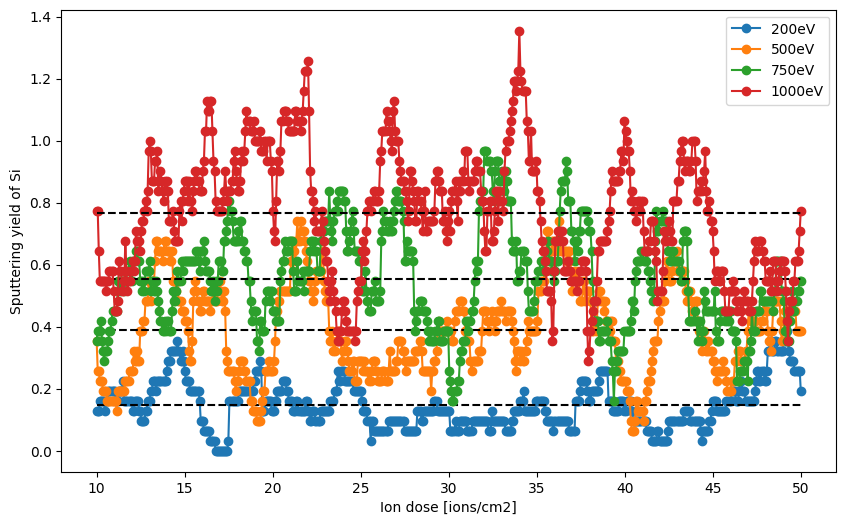

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

for target in target_dict:
    path = target["path"]
    label = target["label"]
    area = target["area"]
    print(path)
    print(label)
    sy_calculator = SputteringYieldCalculator(path)
    sp_with_ion_dose_df = sy_calculator.get_sputtering_yield_with_ion_dose(
        area=area,
        num_injection=15,
        target_atom_type=target_atom_type
    )
    if is_deposited:
        sp_with_ion_dose_df["num_sputtered_atom_avg"] = sp_with_ion_dose_df["num_sputtered_atom_avg"] - 1

    sp_with_ion_dose_df = sp_with_ion_dose_df[(sp_with_ion_dose_df["ion_dose"] >= ion_dose_range[0]) & (sp_with_ion_dose_df["ion_dose"] <= ion_dose_range[1])].copy()
    average_sp = sp_with_ion_dose_df["num_sputtered_atom_avg"].mean()

    ax.plot(sp_with_ion_dose_df["ion_dose"], sp_with_ion_dose_df["num_sputtered_atom_avg"], marker="o", label=label)
    ax.plot([ion_dose_range[0], ion_dose_range[1]], [average_sp, average_sp], linestyle="--", color="black")

ax.set_xlabel("Ion dose [ions/cm2]")
ax.set_ylabel("Sputtering yield of Si")
ax.legend()